In [1]:
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [49]:
def dissimilarity_feature(matrix_coocurrence):
    dissimilarity = graycoprops(matrix_coocurrence, 'dissimilarity') 
    return "Dissimilarity = ", dissimilarity
def homogeneity_feature(matrix_coocurrence):
    homogeneity = graycoprops(matrix_coocurrence, 'homogeneity')
    return "Homogeneity = ", homogeneity
def energy_feature(matrix_coocurrence):
    energy = graycoprops(matrix_coocurrence, 'energy')
    return "Energy = ", energy
def correlation_feature(matrix_coocurrence):
    correlation = graycoprops(matrix_coocurrence, 'correlation')
    return "Correlation = ", correlation
def entropy_feature(matrix_coocurrence):
    entropy = graycoprops(matrix_coocurrence, 'entropy')
    return "Entropy = ", entropy

In [2]:
from tifffile import imread
def img_read(x):
    img=imread(x)
    return img

In [51]:
def show(g):
    # Display matrix
    #print(g)
    plt.figure(figsize=(20,20))
    plt.subplot(141)
    plt.title(" 0 degree ")
    plt.imshow(g[:,:,0,0],cmap='gray')
    plt.subplot(142)
    plt.title(" 45 degree ")
    plt.imshow(g[:,:,0,1],cmap='gray')
    plt.subplot(143)
    plt.title(" 90 degree ")
    plt.imshow(g[:,:,0,2],cmap='gray')
    plt.subplot(144)
    plt.title(" 135 degree ")
    plt.imshow(g[:,:,0,3],cmap='gray')
    plt.show()


In [29]:
# stego=os.listdir('./Stego_Image_Generation/airplane')
# path='./Stego_Image_Generation/airplane/'
stego=os.listdir('./CoverImages')
print(stego)
path='./CoverImages/'
glcm=[]
# im=img_read('./Stego_Image_Generation/test.tif')
# print(im.shape)

for i in stego:
    im=cv2.imread(path+str(i),0)
    s=MinMaxScaler((0,255)).fit_transform(im).astype(int)
    glcm.append(graycomatrix(s,[1],[0,np.pi/4,np.pi/2,3*np.pi/3],levels=256,symmetric=False,normed=True))
glcm=np.array(glcm)

['airplane.tiff', 'baboon.tiff', 'Barbara.tif', 'elaine.tiff', 'fishingboat.tiff', 'Goldhill.tif', 'house.tiff', 'lena.tiff', 'peeper.tiff', 'sailboat.tiff', 'splash.tiff', 'tank.tiff']


In [ ]:
# f1=f2=f3=f4=[]
# for i in glcm:
#     f1.append(graycoprops(i,'contrast'))
#     f2.append(graycoprops(i,'correlation'))
#     f3.append(graycoprops(i,'homogeneity'))
#     f4.append(graycoprops(i,'dissimilarity'))
# f1=np.array(f1)
# f2=np.array(f2)
# f3=np.array(f3)
# f4=np.array(f4)

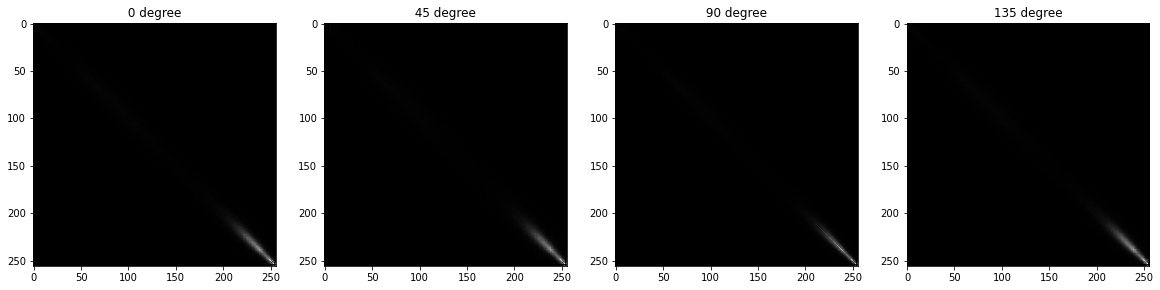

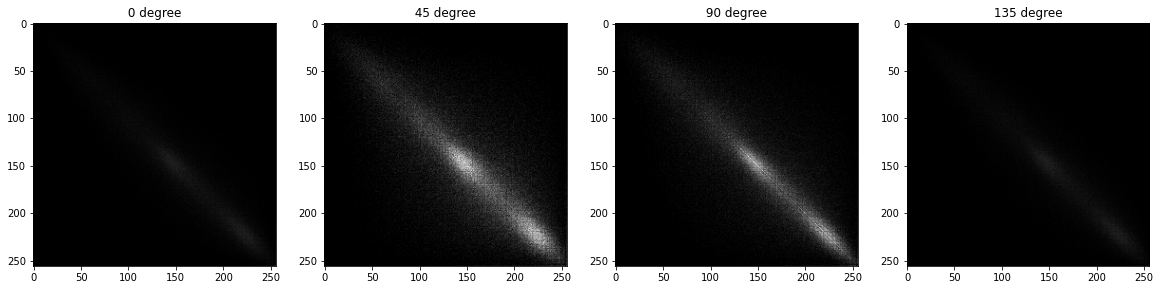

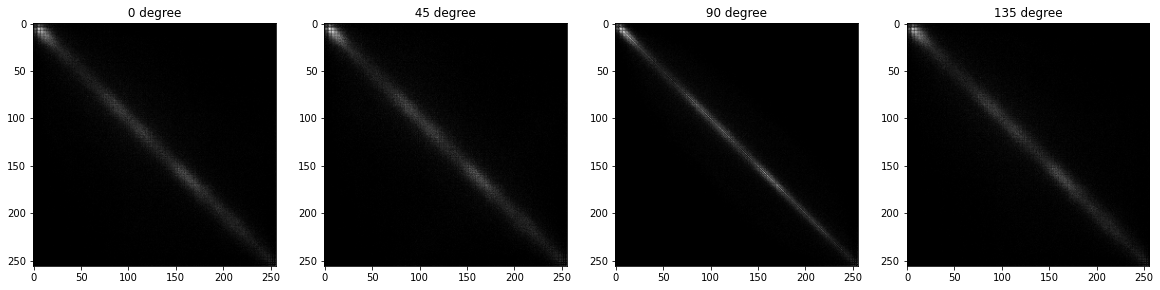

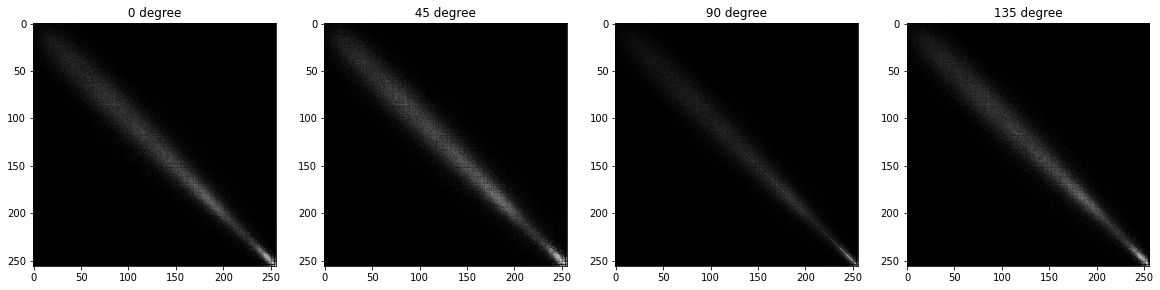

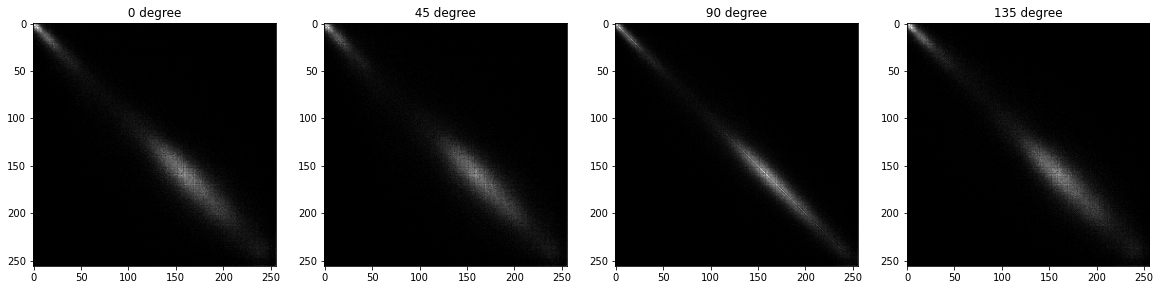

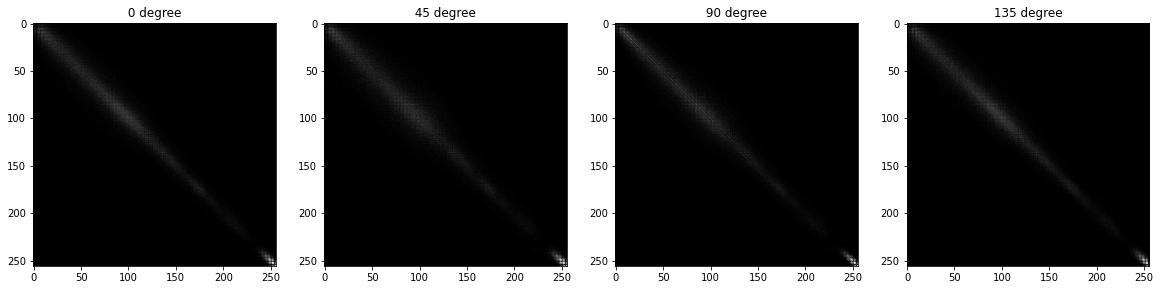

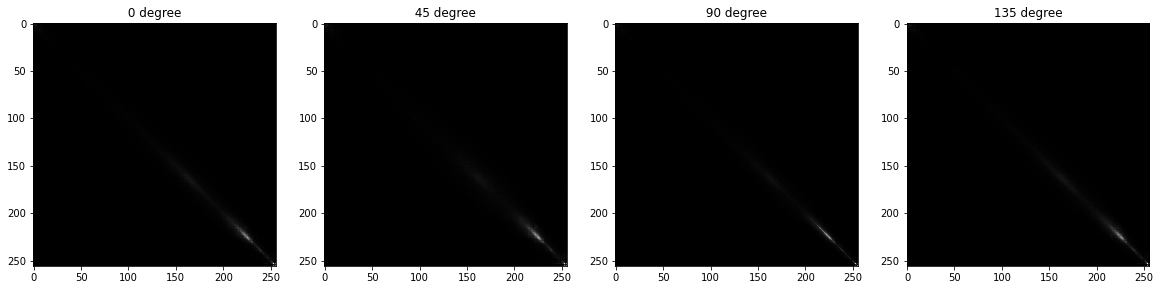

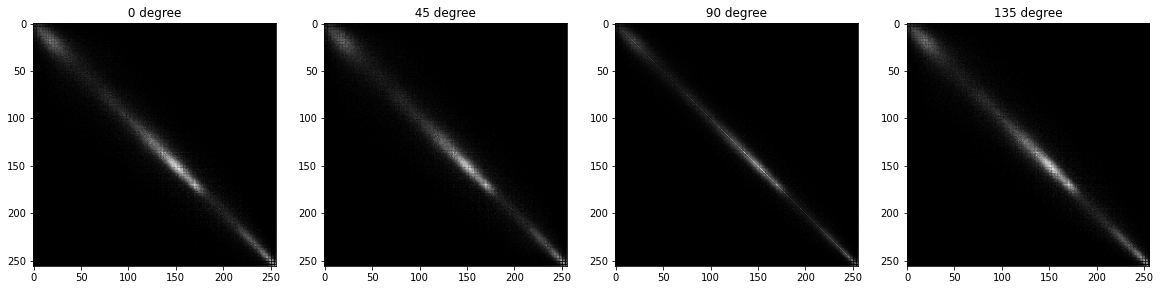

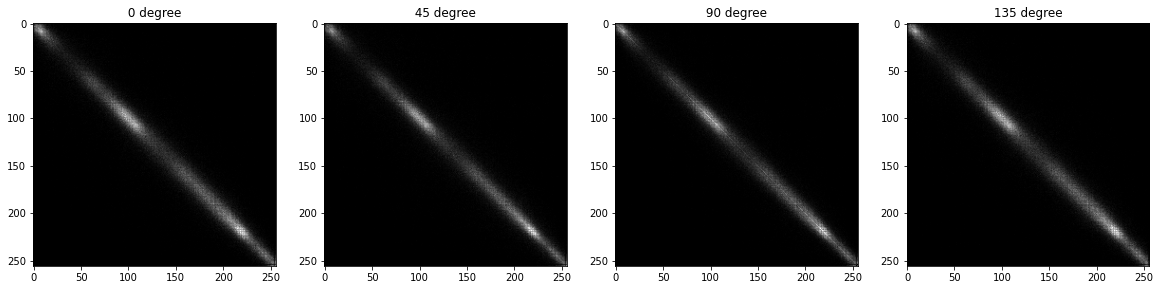

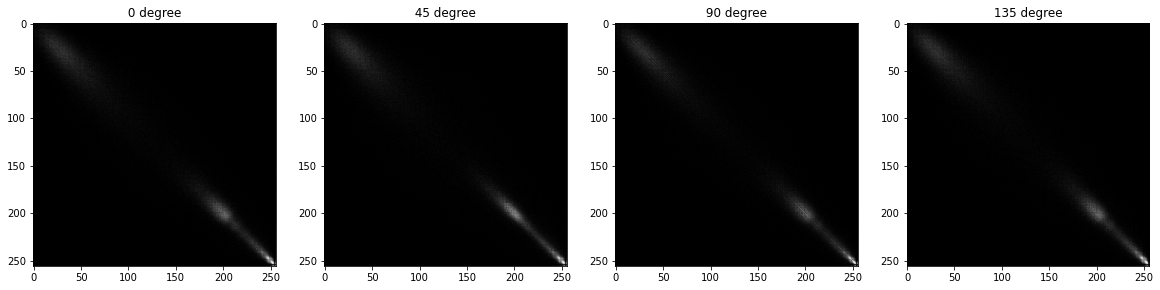

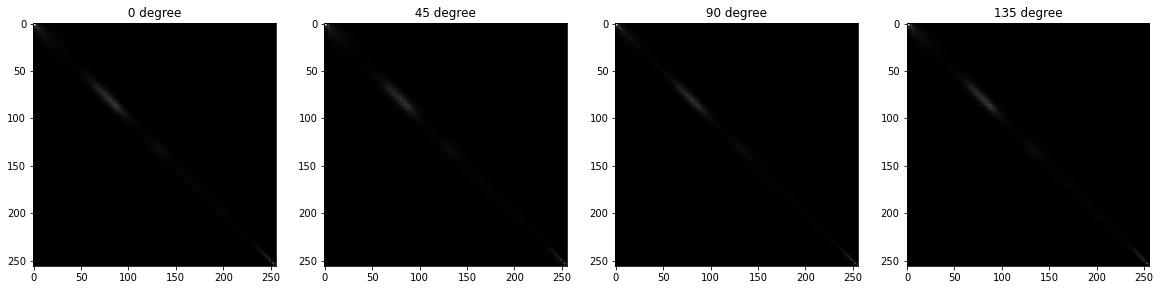

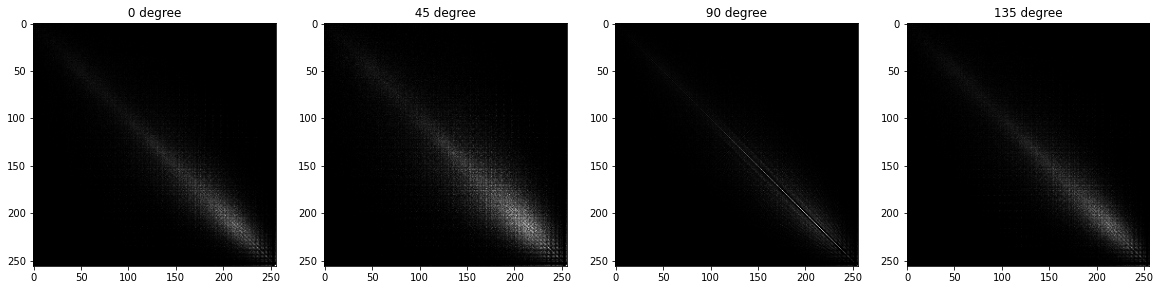

In [ ]:
# for i in glcm:
#     show(i)

In [43]:
avg_glcm=[]
for i in glcm:
    avg_glcm.append(((i[:,:,0,0]+i[:,:,0,1]+i[:,:,0,2]+i[:,:,0,3])/4))
avg_glcm=np.array(avg_glcm)
print(avg_glcm.shape)

(12, 256, 256)


In [ ]:
# f1=f2=f3=f4=f5=[]
# for i in avg_glcm:
#     f1.append(graycoprops(np.reshape(i,(256,256,1,1)),'contrast'))
#     f2.append(graycoprops(np.reshape(i,(256,256,1,1)),'correlation'))
#     f3.append(graycoprops(np.reshape(i,(256,256,1,1)),'homogeneity'))
#     f4.append(graycoprops(np.reshape(i,(256,256,1,1)),'dissimilarity'))
#     f5.append(graycoprops(np.reshape(i,(256,256,1,1)),'energy'))
#     print(f1)
# f5=np.array(f5)
# f1=np.array(f1)
# f2=np.array(f2)
# f3=np.array(f3)
# f4=np.array(f4)

[array([[341.56452507]]), array([[0.95999154]]), array([[0.22218888]]), array([[8.96846584]]), array([[0.02776635]])]
[array([[341.56452507]]), array([[0.95999154]]), array([[0.22218888]]), array([[8.96846584]]), array([[0.02776635]]), array([[1200.14200415]]), array([[0.80283533]]), array([[0.06549351]]), array([[23.33644649]]), array([[0.00812093]])]
[array([[341.56452507]]), array([[0.95999154]]), array([[0.22218888]]), array([[8.96846584]]), array([[0.02776635]]), array([[1200.14200415]]), array([[0.80283533]]), array([[0.06549351]]), array([[23.33644649]]), array([[0.00812093]]), array([[1053.63703666]]), array([[0.88103718]]), array([[0.11174326]]), array([[18.995541]]), array([[0.00960886]])]
[array([[341.56452507]]), array([[0.95999154]]), array([[0.22218888]]), array([[8.96846584]]), array([[0.02776635]]), array([[1200.14200415]]), array([[0.80283533]]), array([[0.06549351]]), array([[23.33644649]]), array([[0.00812093]]), array([[1053.63703666]]), array([[0.88103718]]), array

In [ ]:
# test=avg_glcm[0]
# f1=(graycoprops(np.reshape(test,(256,256,1,1)),'contrast'))
# f1=np.array(f1)
# print(f1.shape)

(1, 1)


In [ ]:
# f5.shape

(60, 1, 1)

In [ ]:
# f1=f1.ravel()
# f2=f2.ravel()
# f3=f3.ravel()
# f4=f4.ravel()
# f5=f5.ravel()

In [44]:
newglcm=[]
for i in range(avg_glcm.shape[0]):
    newglcm.append(avg_glcm[i,:,:].ravel())
newglcm=np.array(newglcm)

In [46]:
newglcm.shape

(12, 65536)

In [49]:
# pca=PCA(n_components=100)
# glcm_transformed=[]
# glcm_transformed=pca.fit_transform(newglcm)
# # for i in range(avg_glcm.shape[0]):
# #     glcm_transformed.append(pca.fit_transform(avg_glcm[i]))
# glcm_transformed=np.array(glcm_transformed)

In [54]:
# col=[x for x in range(newglcm.shape[1])]
# df=pd.DataFrame(newglcm,columns=col)
# sc=StandardScaler()
# df1=sc.fit_transform(df)
# pca=PCA(200)
# pca_df=pca.fit_transform(df1)

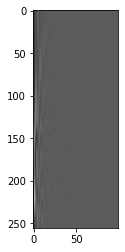

In [ ]:
# plt.imshow(glcm_transformed[1],cmap='gray')

In [ ]:
# col=[x for x in range(glcm_transformed.shape[1]*glcm_transformed.shape[2])]
# flat_glcm=[]
# for i in range(avg_glcm.shape[0]):
#     flat_glcm.append(glcm_transformed[i].ravel())
# flat_glcm=np.array(flat_glcm)

In [ ]:
# flat_glcm.shape

(12, 25600)

In [ ]:
# df=pd.DataFrame(flat_glcm,columns=col)
# df[glcm_transformed.shape[1]*glcm_transformed.shape[2]]=1
# df.shape

(12, 25601)

In [ ]:
# df.head()

,0,1,2,3,4,5,6,7,8,9,...,25591,25592,25593,25594,25595,25596,25597,25598,25599,25600
0,-0.000338,-0.000045,-0.000154,-0.000065,-0.000064,0.000030,-0.000053,-0.000024,-0.000029,-0.000034,...,5.184071e-08,-2.361132e-07,1.353726e-07,-1.659613e-07,-3.568367e-08,-5.283010e-08,1.076434e-07,-6.287876e-08,1.156683e-07,1
1,-0.000122,-0.000205,-0.000061,-0.000110,-0.000113,0.000094,0.000816,0.000270,0.000158,0.000035,...,-3.261172e-06,6.889027e-06,-2.930411e-06,5.916552e-08,9.914250e-07,2.126241e-07,-4.466764e-06,-1.092866e-06,3.805200e-07,1
2,0.000453,0.000037,0.000019,0.000059,0.000129,0.000117,0.000129,-0.000073,0.000040,-0.000076,...,-6.505412e-06,2.466114e-06,1.537086e-06,1.421564e-06,4.508488e-06,-1.849193e-07,-8.935990e-06,-1.106593e-06,-7.768454e-06,1
3,-0.000055,-0.000137,0.000054,-0.000119,-0.000143,0.000101,-0.000119,0.000073,-0.000080,-0.000143,...,-2.772044e-06,1.689127e-06,7.079933e-06,-2.954101e-06,-6.028114e-06,2.503261e-06,2.333325e-06,-3.858377e-06,3.897358e-06,1
4,-0.000313,0.000053,0.000592,0.000330,-0.000299,-0.000013,-0.000131,0.000023,0.000141,-0.000129,...,2.101489e-06,-1.301243e-06,4.862304e-06,-1.416032e-06,1.380502e-06,-4.443330e-06,1.059306e-06,3.463297e-07,-6.230495e-07,1


In [5]:
def glcm_df_generator(stegoPath,d):
    stego=os.listdir(stegoPath)
    path=stegoPath+'/'
    glcm=[]
    for i in stego:
        im=imread(path+str(i))
        s=MinMaxScaler((0,255)).fit_transform(im).astype(int)
        glcm.append(graycomatrix(s,[1],[0,np.pi/4,np.pi/2,3*np.pi/3],levels=256,symmetric=False,normed=True))
    glcm=np.array(glcm)
    avg_glcm=[]
    for i in glcm:
        avg_glcm.append(((i[:,:,0,0]+i[:,:,0,1]+i[:,:,0,2]+i[:,:,0,3])/4))
    avg_glcm=np.array(avg_glcm) 
    # pca=PCA(n_components=100)
    newglcm=[]
    for i in range(avg_glcm.shape[0]):
        newglcm.append(avg_glcm[i,:,:].ravel())
    newglcm=np.array(newglcm)
    col=[x for x in range(newglcm.shape[1])]
    df=pd.DataFrame(newglcm,columns=col)
    sc=StandardScaler()
    df1=sc.fit_transform(df)
    pca=PCA(200)
    pca_df=pca.fit_transform(df1)
    # pca_df[200]=d
    return pca_df

In [6]:
dfStego=glcm_df_generator('./Stego_Image_Generation/airplane',1)
dfOriginal=glcm_df_generator('./Original_Image/airplane',0)

In [9]:
col=[x for x in range(200)]
df1=pd.DataFrame(dfOriginal,columns=col)
df2=pd.DataFrame(dfStego,columns=col)
df1[200]=0
df2[200]=1

In [11]:
finaldf=df1.append(df2)

C:\Users\JOJO\AppData\Local\Temp\ipykernel_3668\1541843480.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finaldf=df1.append(df2)


In [61]:
# dffull=[]
# dffull.append(dfOriginal)
# dffull.append(dfStego)
# dffull=np.array(dffull)
# dffull.shape

(2, 1000, 200)

In [56]:
# dffull.shape

(2000, 65536)

In [12]:
finaldf.to_csv('./Output/glcmpca1000pca200.csv')

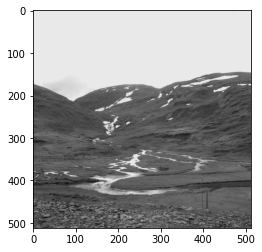

In [8]:
img2=imread('./Stego_Image_Generation/airplane/wtr_airplane.tiff_host_1.pgm_stego.tif')
plt.imshow(img2,cmap='gray')